In [ ]:
%pip install matplotlib
%pip install pyserial

In [13]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
import serial
import time
import csv

In [125]:
system_frequency = 60
seconds = 20
average_seconds = 2

average_samples = system_frequency * average_seconds
total_samples = system_frequency * seconds

In [126]:
power_vision = serial.Serial(
    port='COM7',
    baudrate=115200,
)

voltage_a_rms_array = []
average_voltage_a_rms_array = []
frequency_array = []
average_frequency_array = []
time_in_ms = []

number_of_samples = 0
start_time = time.time()
while number_of_samples < total_samples:
    data = power_vision.readline().decode().strip();
    if data:
        data = data.split(',')
        try:
            frequency_array.append(float(data[0]))
            voltage_a_rms_array.append(float(data[1]))
            time_in_ms.append(time.time() - start_time)
            
            voltage_rms_length = len(voltage_a_rms_array)
            start = len(voltage_a_rms_array) - average_samples if len(voltage_a_rms_array) > average_samples else 0

            average_voltage_a_rms = sum(voltage_a_rms_array[start:]) / (voltage_rms_length - start)
            average_frequency = sum(frequency_array[start:]) / (voltage_rms_length - start)
            average_voltage_a_rms_array.append(average_voltage_a_rms)
            average_frequency_array.append(average_frequency)
            number_of_samples+=1
        except ValueError:
            continue

power_vision.close()

In [111]:
power_vision.close()

205.47683333333333


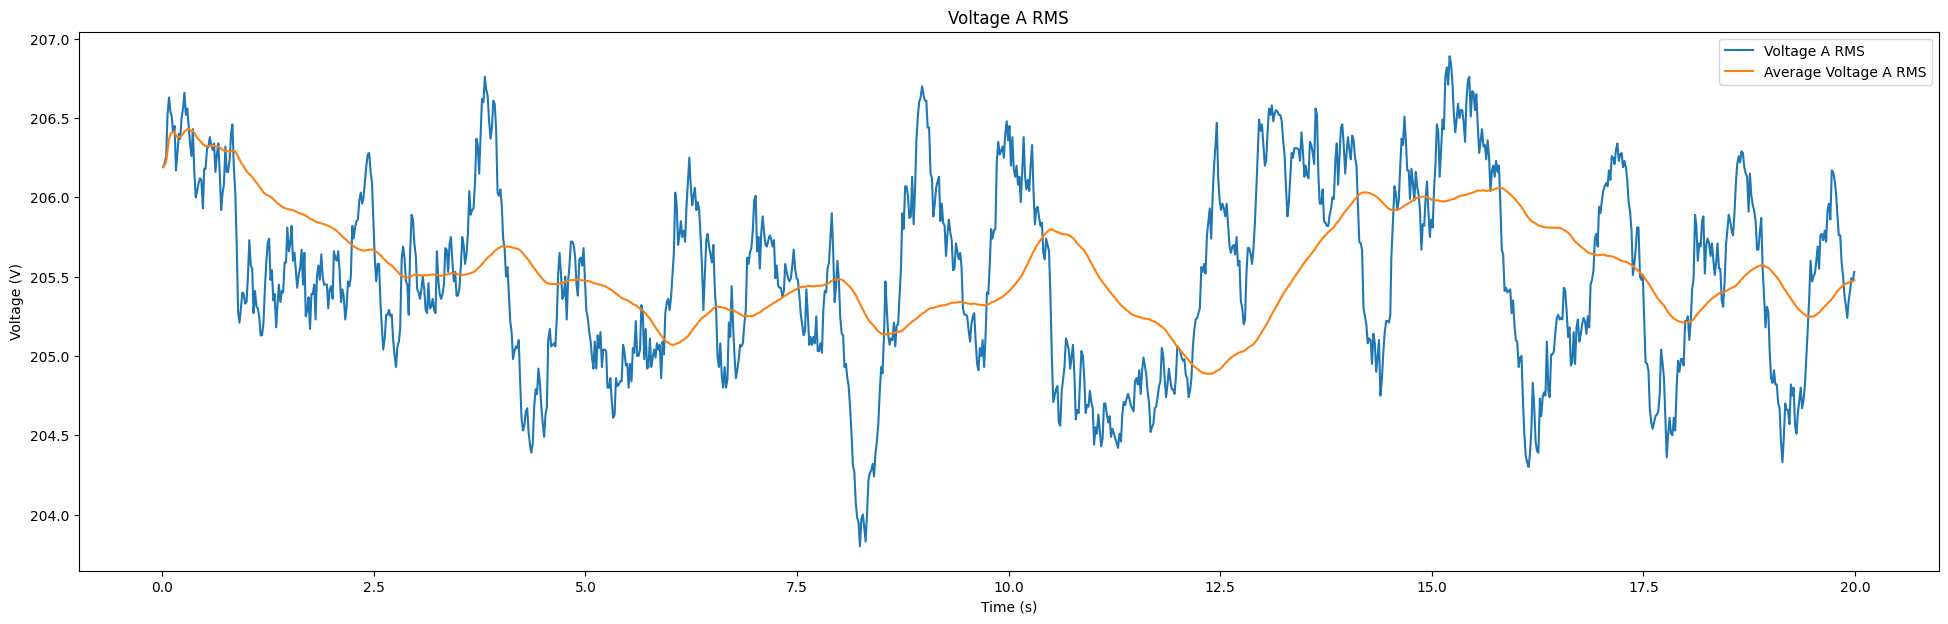

In [127]:
print(average_voltage_a_rms_array[-1])
plt.figure(figsize=(24, 7))
plt.title('Voltage A RMS')
plt.plot(time_in_ms, voltage_a_rms_array, label='Voltage A RMS')
plt.plot(time_in_ms, average_voltage_a_rms_array, label='Average Voltage A RMS')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.legend()
plt.show()

60.03538833333334


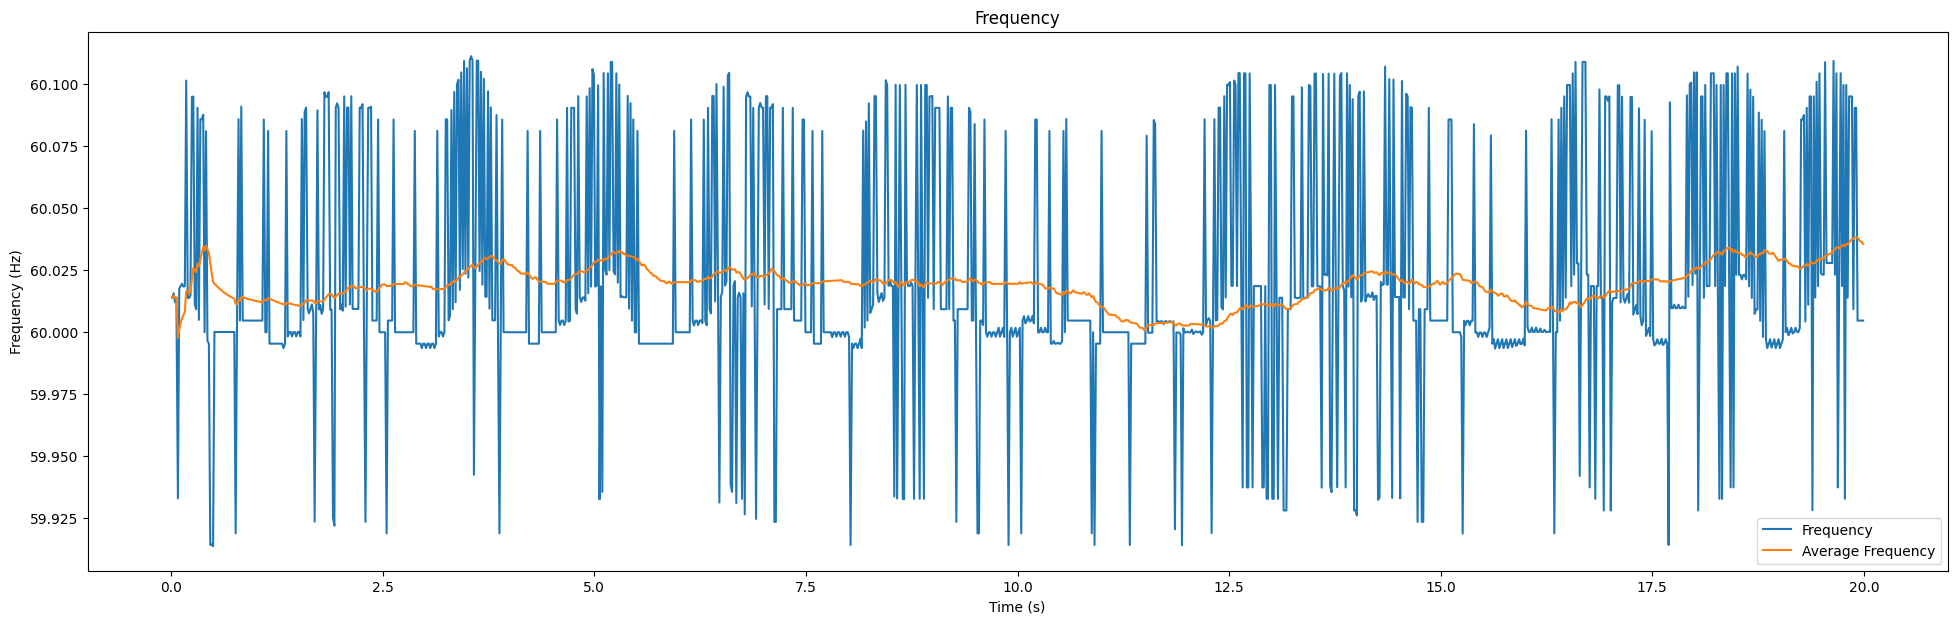

In [128]:
print(average_frequency_array[-1])
plt.figure(figsize=(24, 7))
plt.title('Frequency')
plt.plot(time_in_ms, frequency_array, label='Frequency')
plt.plot(time_in_ms, average_frequency_array, label='Average Frequency')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.legend()
plt.show()

In [ ]:
timestamp = time.strftime('%Y%m%d-%H%M%S')
file_name = f"./data/{total_samples}-voltage_a_rms-{timestamp}.csv"

with open(file_name, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([
        'Voltage A RMS',
        'Average Voltage A RMS',
        'Frequency',
        'Average Frequency'
    ])
    for index in range(total_samples):
        writer.writerow([
            voltage_a_rms_array[index],
            average_voltage_a_rms_array[index],
            frequency_array[index],
            average_frequency_array[index]
        ])

print(f"Data exported to {file_name}")